#**Project Title:** Crop Recommendation System Using Various Machine Learning Algorithms.

#**Name:** Dipa Rani Sarker

#**ID:** 2037820121

#Importing Libraries

In [ ]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, r2_score, roc_auc_score, roc_curve, classification_report

import joblib
import pickle
import warnings
warnings.simplefilter(action='ignore')
sns.set()
#plt.style.use("ggplot")
%matplotlib inline

#Loading Dataset

In [ ]:
# Read the dataset
original_dataset = pd.read_csv('/content/Crop_recommendation.csv')
df = original_dataset
df

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

# Data Preprocessing

In [ ]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.shape

(2200, 8)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# descriptive statistics of the dataset
df.describe().T.style.background_gradient(axis=0, cmap='Set2')

Checking Missing Values

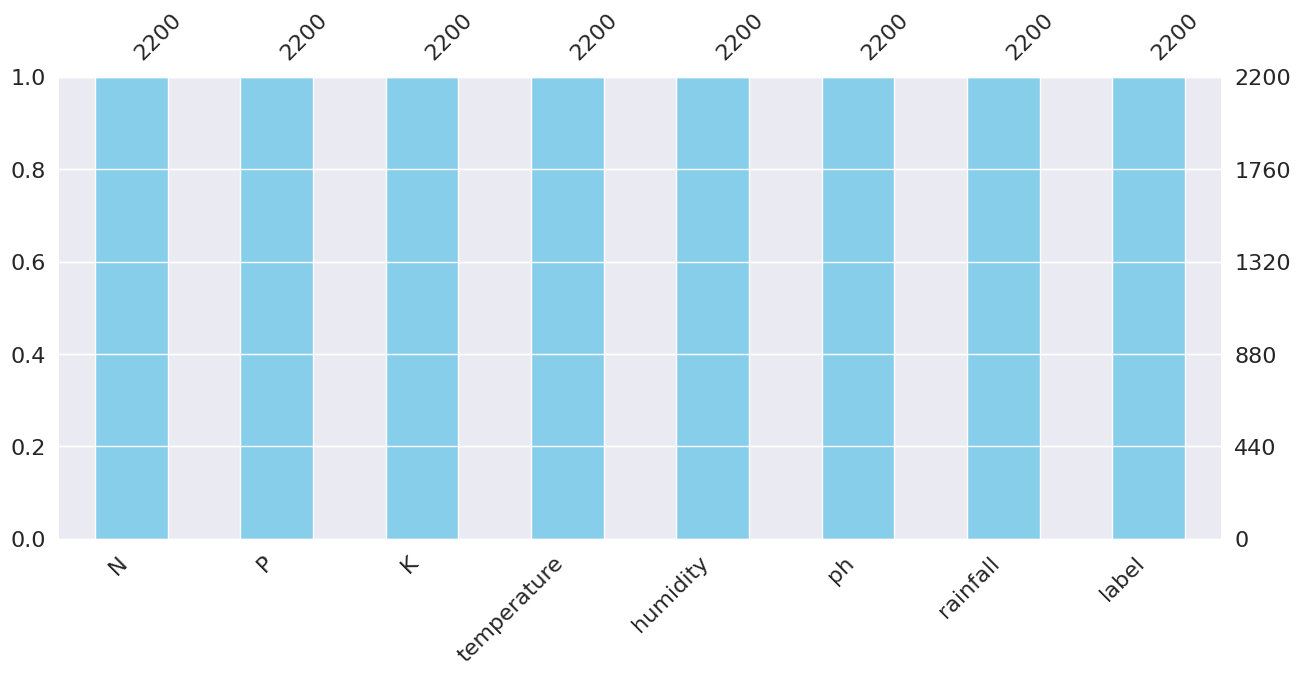

In [ ]:
msno.bar(df, color='skyblue')         # Create the missing value bar chart
plt.gcf().set_size_inches(15, 6)      # Set the current figure size
plt.show()

In [ ]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

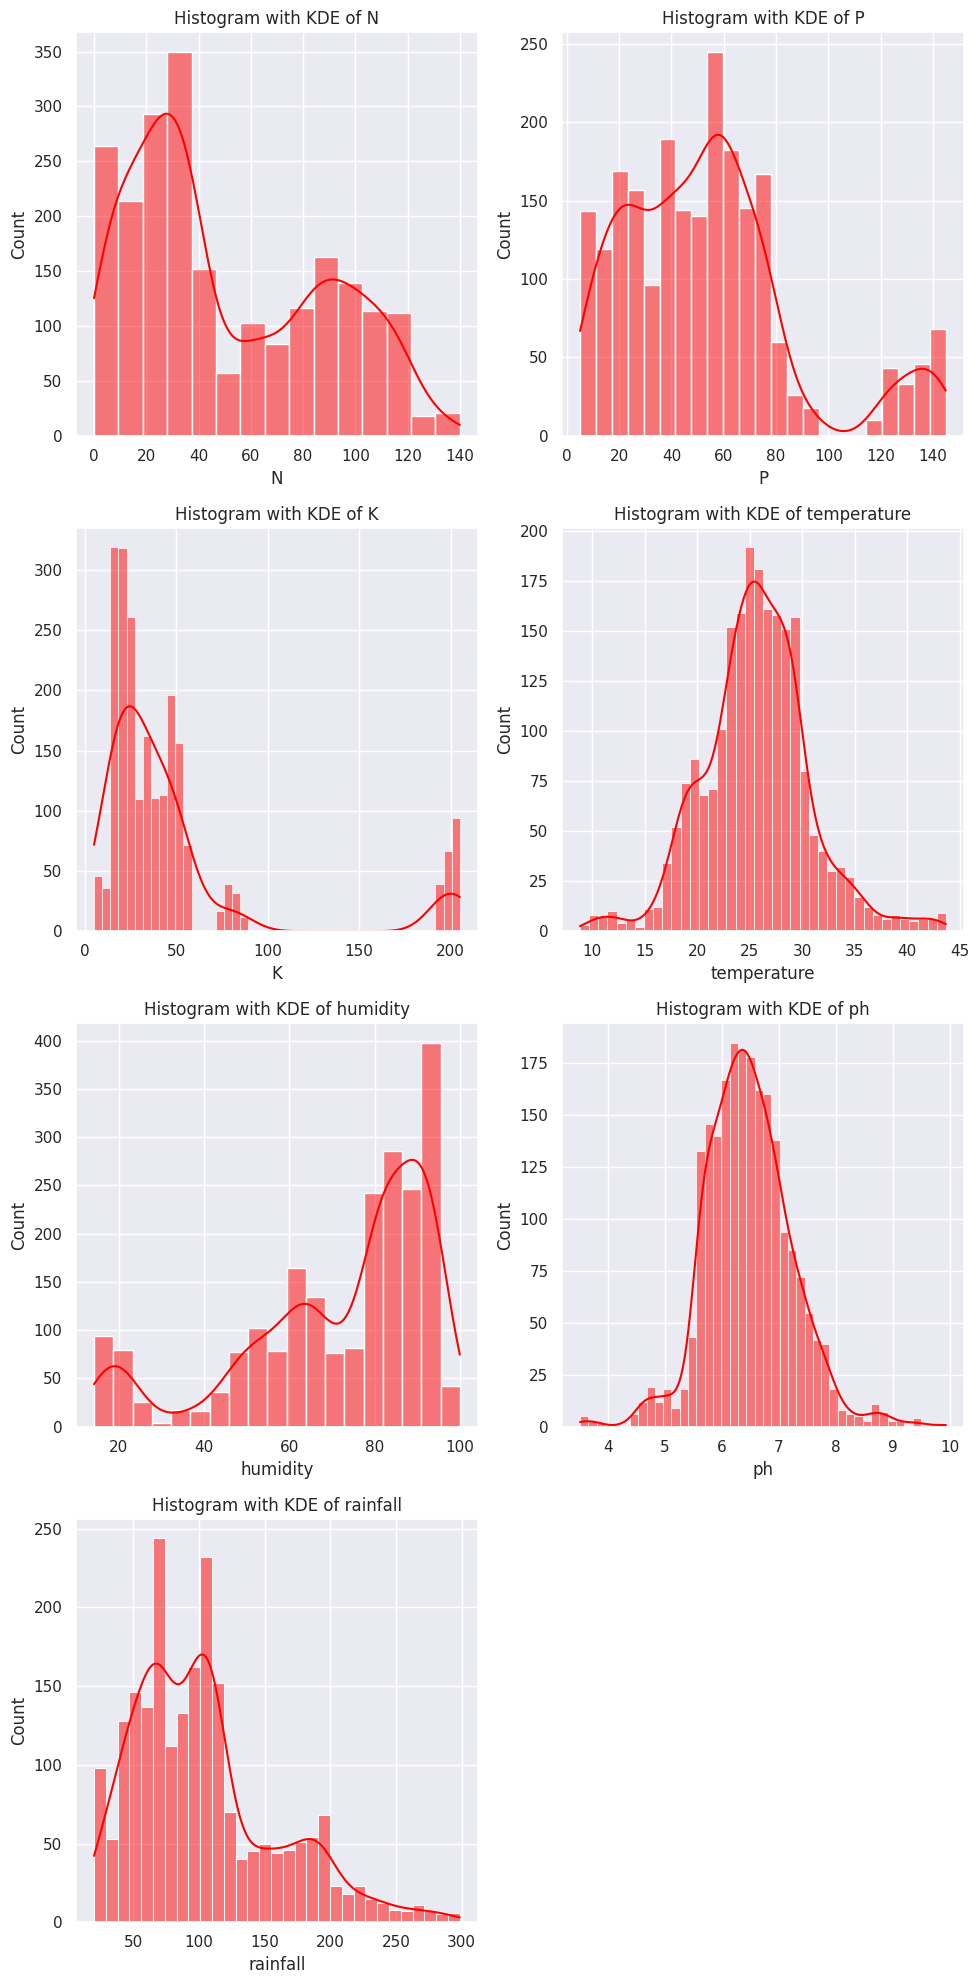

In [ ]:
# Histogram with KDE of attributes
num_columns = len(df.columns) - 1
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))

for i, column in enumerate(df.columns.drop('label')):
    plt.subplot(num_rows, 2, i+1)

    sns.histplot(data=df, x=column, kde=True, fill=True, color='red')

    plt.title(f'Histogram with KDE of {column}')

plt.tight_layout()
plt.show()

Encoding

In [ ]:
# Encoding using dictionary
df_dict = {
    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean': 7,
    'blackgram': 8,
    'lentil': 9,
    'pomegranate': 10,
    'banana': 11,
    'mango': 12,
    'grapes': 13,
    'watermelon': 14,
    'muskmelon': 15,
    'apple': 16,
    'orange': 17,
    'papaya': 18,
    'coconut': 19,
    'cotton': 20,
    'jute': 21,
    'coffee': 22
}
df['crop_number']=  df['label'].map(df_dict)
df

N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

      crop_number  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
2195           22  
2196           22  
2197           22  
2198           22  
2199           22  

[2200 rows x 9 columns]

In [ ]:
df.drop(['label'],axis=1,inplace=True)
df

N   P   K  temperature   humidity        ph    rainfall  crop_number
0      90  42  43    20.879744  82.002744  6.502985  202.935536            1
1      85  58  41    21.770462  80.319644  7.038096  226.655537            1
2      60  55  44    23.004459  82.320763  7.840207  263.964248            1
3      74  35  40    26.491096  80.158363  6.980401  242.864034            1
4      78  42  42    20.130175  81.604873  7.628473  262.717340            1
...   ...  ..  ..          ...        ...       ...         ...          ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507           22
2196   99  15  27    27.417112  56.636362  6.086922  127.924610           22
2197  118  33  30    24.131797  67.225123  6.362608  173.322839           22
2198  117  32  34    26.272418  52.127394  6.758793  127.175293           22
2199  104  18  30    23.603016  60.396475  6.779833  140.937041           22

[2200 rows x 8 columns]

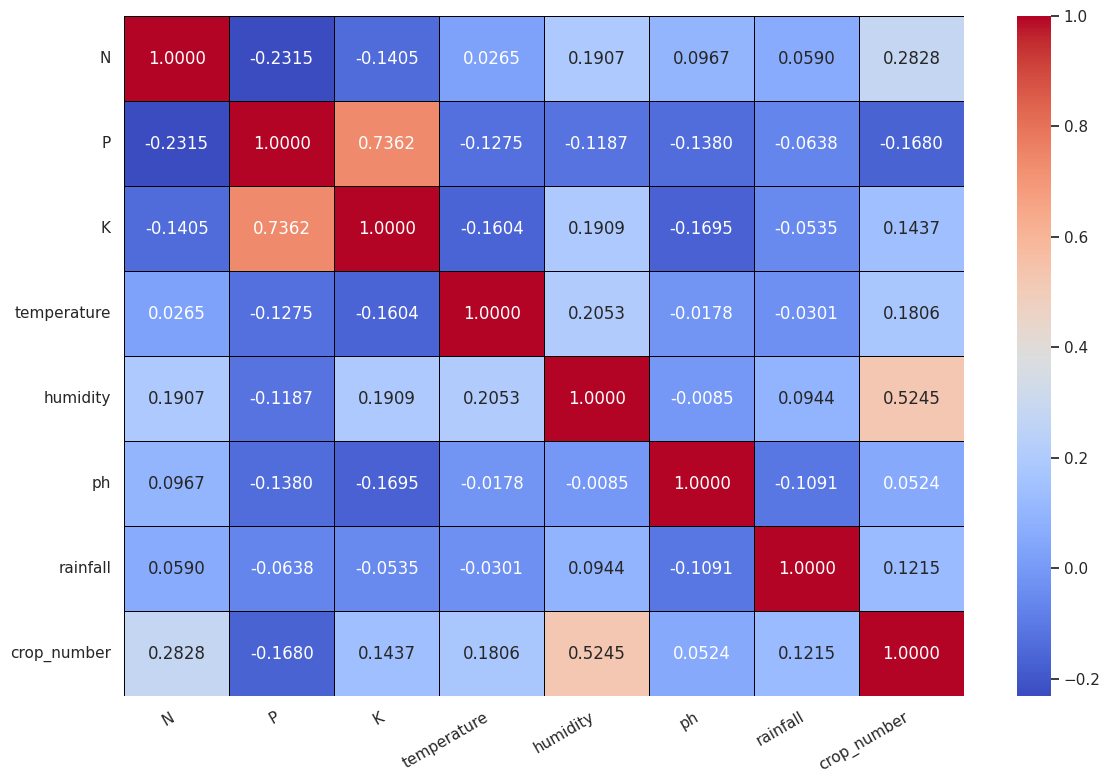

In [ ]:
# correlation matrix
corr_matrix = df.corr()

# Plot heatmap
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, linecolor="black", fmt=".4f", ax=ax, cmap="coolwarm")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

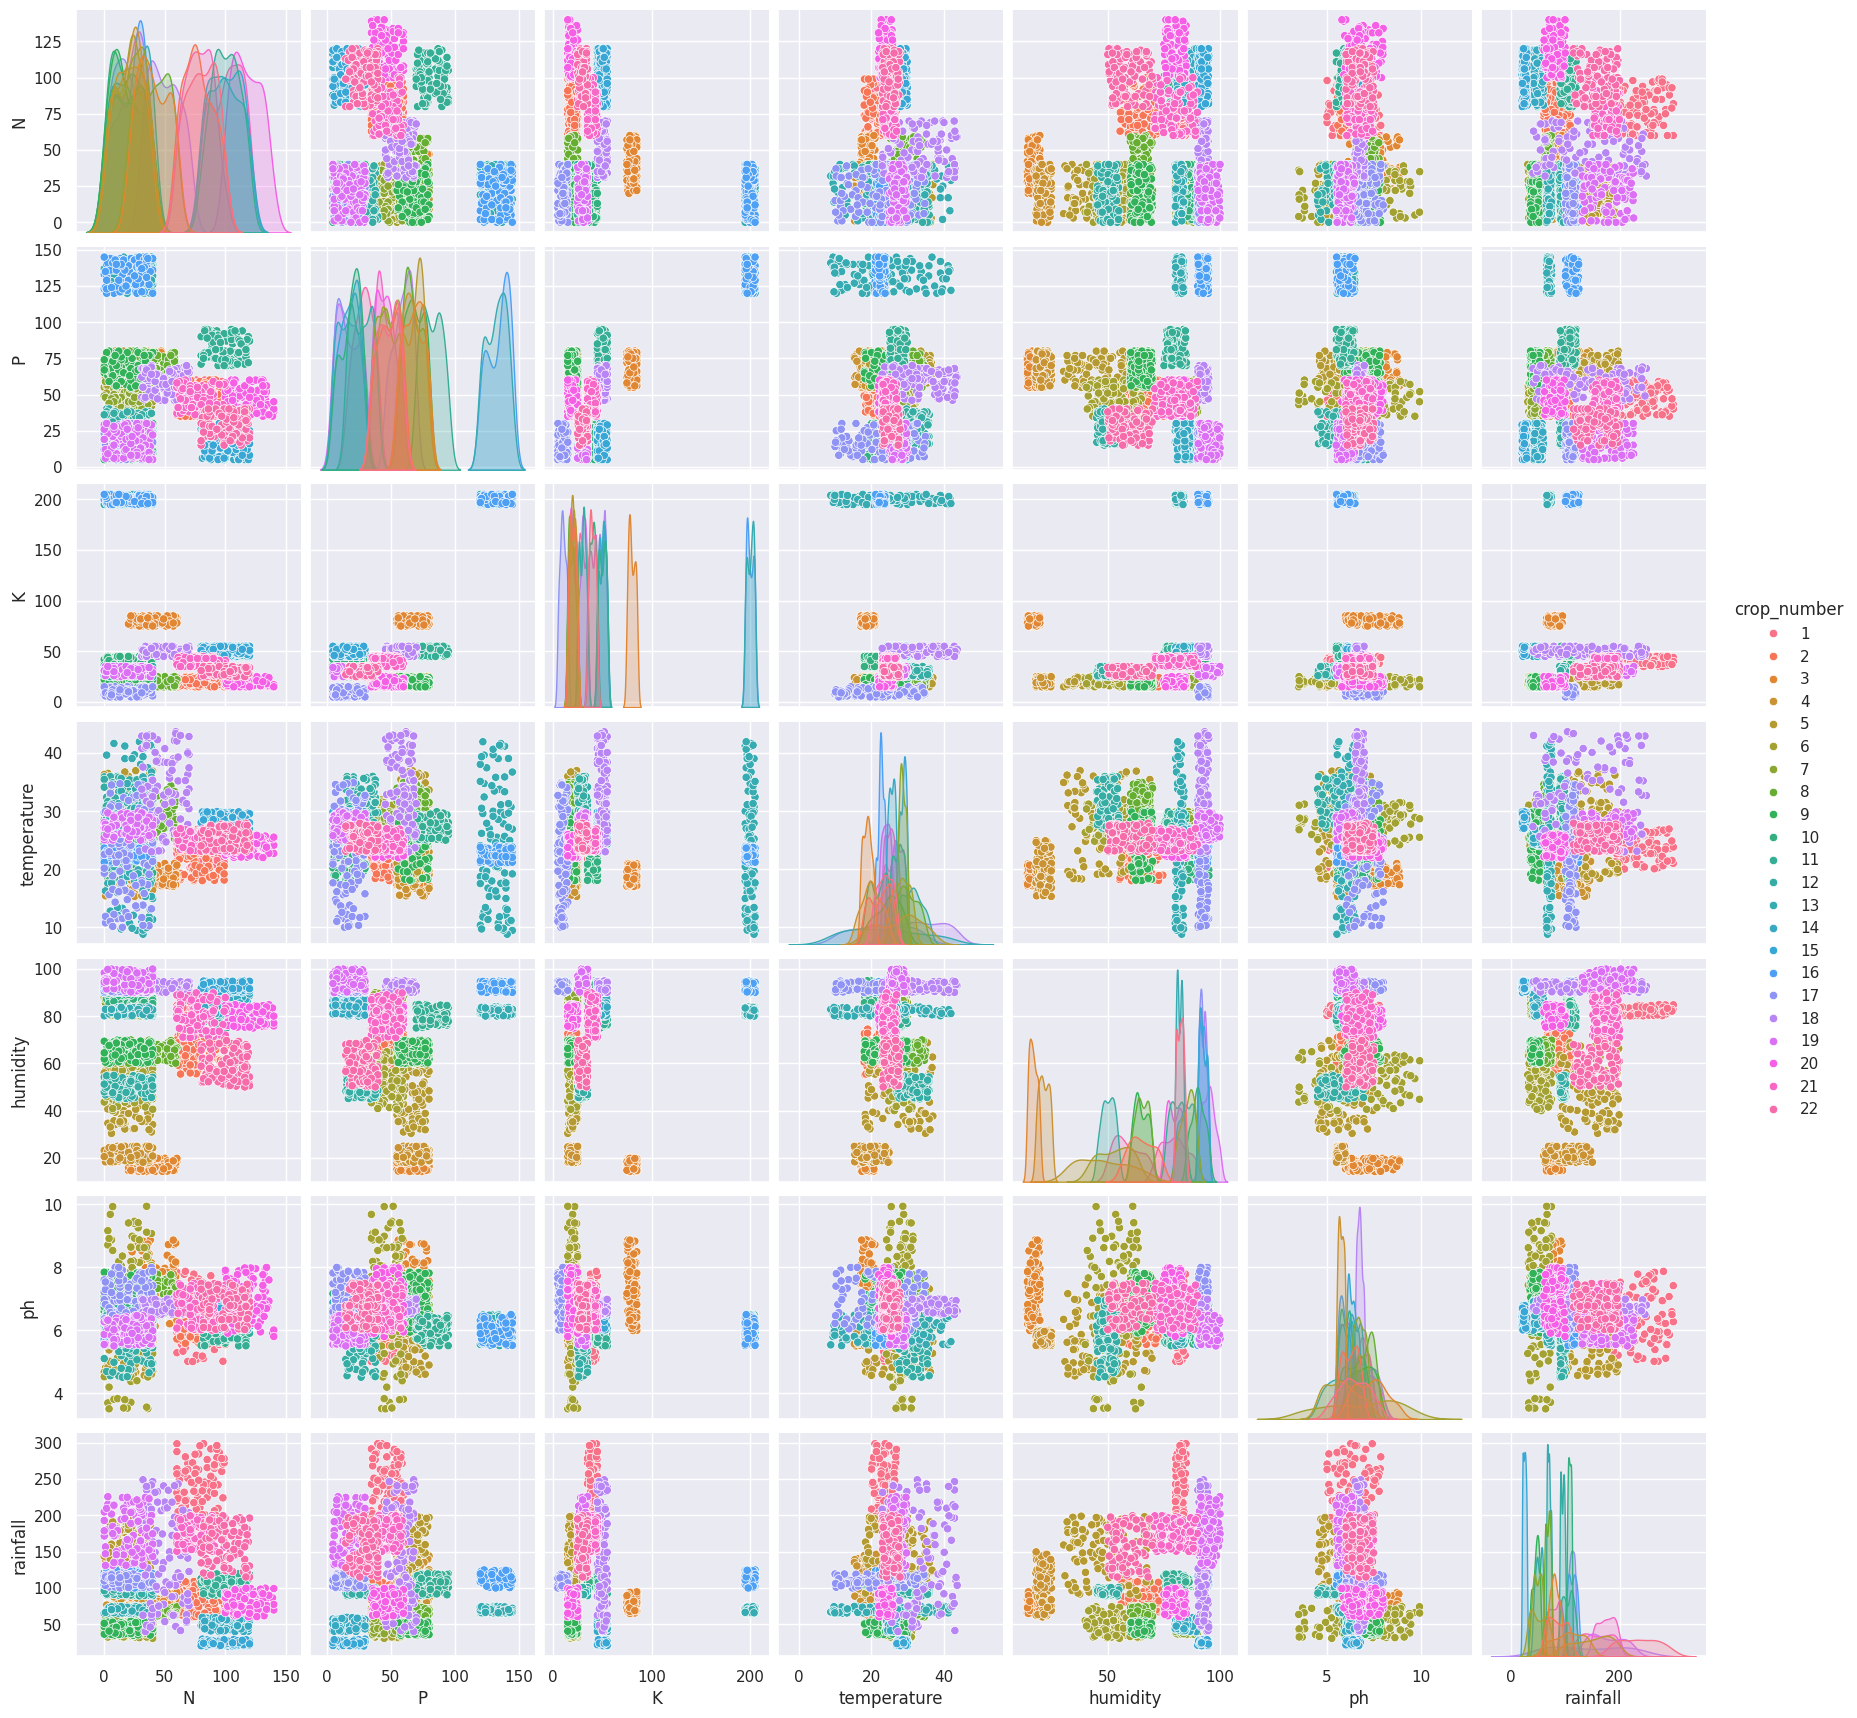

In [ ]:
# Pair Plot
palette = sns.color_palette("husl", df["crop_number"].nunique())
sns.pairplot(df, hue="crop_number", palette=palette)

#Train-Test Split

In [ ]:
X = df.drop(['crop_number'],axis=1)
y = df['crop_number']

In [ ]:
X

N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]

In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_number, Length: 2200, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

N    P    K  temperature   humidity        ph    rainfall
1656   17   16   14    16.396243  92.181519  6.625539  102.944161
752    37   79   19    27.543848  69.347863  7.143943   69.408782
892     7   73   25    27.521856  63.132153  7.288057   45.208411
1041  101   70   48    25.360592  75.031933  6.012697  116.553145
1179    0   17   30    35.474783  47.972305  6.279134   97.790725
...   ...  ...  ...          ...        ...       ...         ...
1638   10    5    5    21.213070  91.353492  7.817846  112.983436
1095  108   94   47    27.359116  84.546250  6.387431   90.812505
1130   11   36   31    27.920633  51.779659  6.475449  100.258567
1294   11  124  204    13.429886  80.066340  6.361141   71.400430
860    32   78   22    23.970814  62.355576  7.007038   53.409060

[1760 rows x 7 columns]

#Scaling using MinMaxScaler

In [ ]:
minmax_scale = MinMaxScaler()

X_train = minmax_scale.fit_transform(X_train)
X_test = minmax_scale.transform(X_test)

In [ ]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [ ]:
class_names = ['rice','maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
               'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
               'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

#ML Algorithms

#Logistic Regression

In [ ]:
# Initialize Logistic Regression with default parameters
log_reg = LogisticRegression()

# Fit to the training data
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Accuracy
train_acc_lr = accuracy_score(y_train, log_reg.predict(X_train))
test_acc_lr = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {train_acc_lr:.4f}')
print(f'Test Accuracy: {test_acc_lr:.4f}')

lr_train_accuracy = train_acc_lr * 100
lr_accuracy = test_acc_lr * 100

Train Accuracy: 0.9477
Test Accuracy: 0.9182


Confusion Matrix: 


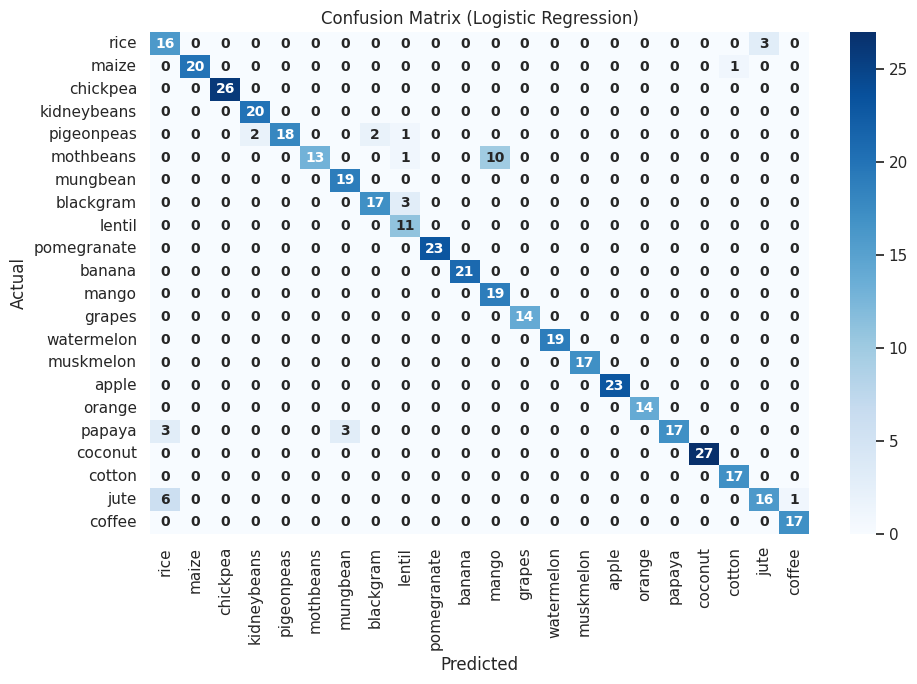

In [ ]:
# Confusion Matrix
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            annot_kws={"size": 10, "weight": "bold"})
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')  # Sensitivity
f1 = f1_score(y_test, y_pred, average='micro')

print("For test set:")
print(f"\nPrecision (micro): {precision:.4f}")
print(f"Recall (micro): {recall:.4f}")
print(f"F1-Score (micro): {f1:.4f}")

For test set:

Precision (micro): 0.9182
Recall (micro): 0.9182
F1-Score (micro): 0.9182


In [ ]:
# Classification Report
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           1       0.64      0.84      0.73        19
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        26
           4       0.91      1.00      0.95        20
           5       1.00      0.78      0.88        23
           6       1.00      0.54      0.70        24
           7       0.86      1.00      0.93        19
           8       0.89      0.85      0.87        20
           9       0.69      1.00      0.81        11
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       0.66      1.00      0.79        19
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        23
          17       1.00      1.00      1.00        14
    

#K-Nearest Neighbors

In [ ]:
# Initialize KNN
knn = KNeighborsClassifier()

# Fit to the training data
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Accuracy
train_acc_knn = accuracy_score(y_train, knn.predict(X_train))
test_acc_knn = accuracy_score(y_test, y_pred)

print(f'Train Accuracy (KNN): {train_acc_knn:.4f}')
print(f'Test Accuracy (KNN): {test_acc_knn:.4f}')

knn_train_accuracy = train_acc_knn * 100
knn_accuracy = test_acc_knn * 100

Train Accuracy (KNN): 0.9909
Test Accuracy (KNN): 0.9682


Confusion Matrix: 


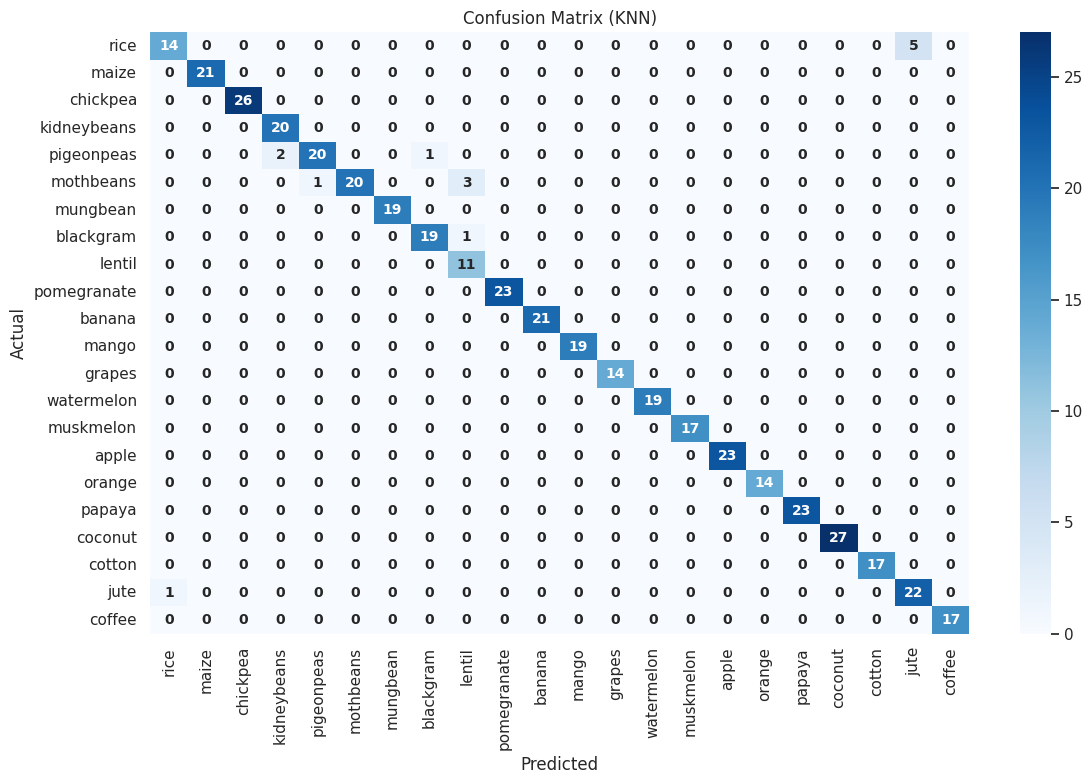

In [ ]:
# Confusion Matrix
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            annot_kws={"size": 10, "weight": "bold"})
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')  # Sensitivity
f1 = f1_score(y_test, y_pred, average='micro')

print("For test set:")
print(f"\nPrecision (micro): {precision:.4f}")
print(f"Recall (micro): {recall:.4f}")
print(f"F1-Score (micro): {f1:.4f}")

For test set:

Precision (micro): 0.9682
Recall (micro): 0.9682
F1-Score (micro): 0.9682


In [ ]:
# Classification Report
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           1       0.93      0.74      0.82        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       0.91      1.00      0.95        20
           5       0.95      0.87      0.91        23
           6       1.00      0.83      0.91        24
           7       1.00      1.00      1.00        19
           8       0.95      0.95      0.95        20
           9       0.73      1.00      0.85        11
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        23
          17       1.00      1.00      1.00        14
    

#Naive Bayes

In [ ]:
# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Fit to the training data
gnb.fit(X_train, y_train)

# Predict on test data
y_pred = gnb.predict(X_test)

# Accuracy
train_acc_gnb = accuracy_score(y_train, gnb.predict(X_train))
test_acc_gnb = accuracy_score(y_test, y_pred)

print(f'Train Accuracy: {train_acc_gnb:.4f}')
print(f'Test Accuracy: {test_acc_gnb:.4f}')

gnb_train_accuracy = train_acc_gnb * 100
gnb_accuracy = test_acc_gnb * 100

Train Accuracy: 0.9949
Test Accuracy: 0.9955


Confusion Matrix: 


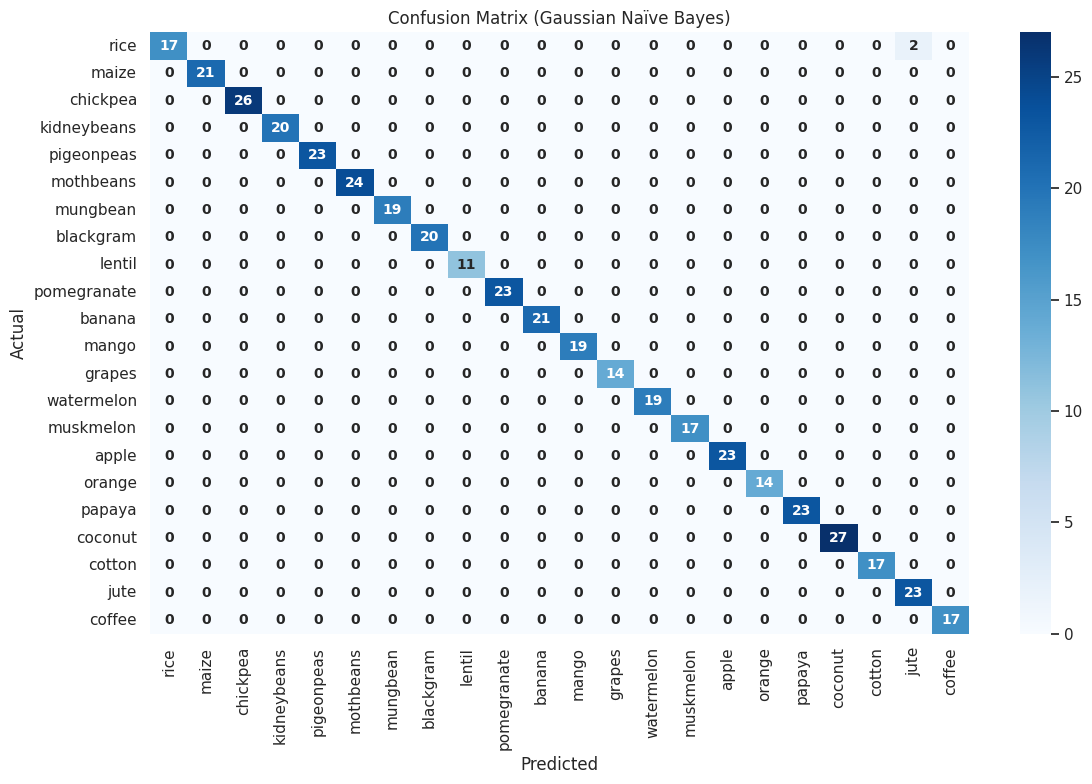

In [ ]:
# Confusion Matrix
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            annot_kws={"size": 10, "weight": "bold"})
plt.title("Confusion Matrix (Gaussian Naïve Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')  # Sensitivity
f1 = f1_score(y_test, y_pred, average='micro')

print("For test set:")
print(f"\nPrecision (micro): {precision:.4f}")
print(f"Recall (micro): {recall:.4f}")
print(f"F1-Score (micro): {f1:.4f}")

For test set:

Precision (micro): 0.9955
Recall (micro): 0.9955
F1-Score (micro): 0.9955


In [ ]:
# Classification Report
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        23
          17       1.00      1.00      1.00        14
    

# Support Vector Machine

In [ ]:
# Initialize SVM
svm_model = SVC(random_state=42)

# Fit to the training data
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Accuracy
train_acc_svm = accuracy_score(y_train, svm_model.predict(X_train))
test_acc_svm = accuracy_score(y_test, y_pred)

print(f'Train Accuracy (SVM): {train_acc_svm:.4f}')
print(f'Test Accuracy (SVM): {test_acc_svm:.4f}')

svm_train_accuracy = train_acc_svm * 100
svm_accuracy = test_acc_svm * 100

Train Accuracy (SVM): 0.9852
Test Accuracy (SVM): 0.9682


Confusion Matrix: 


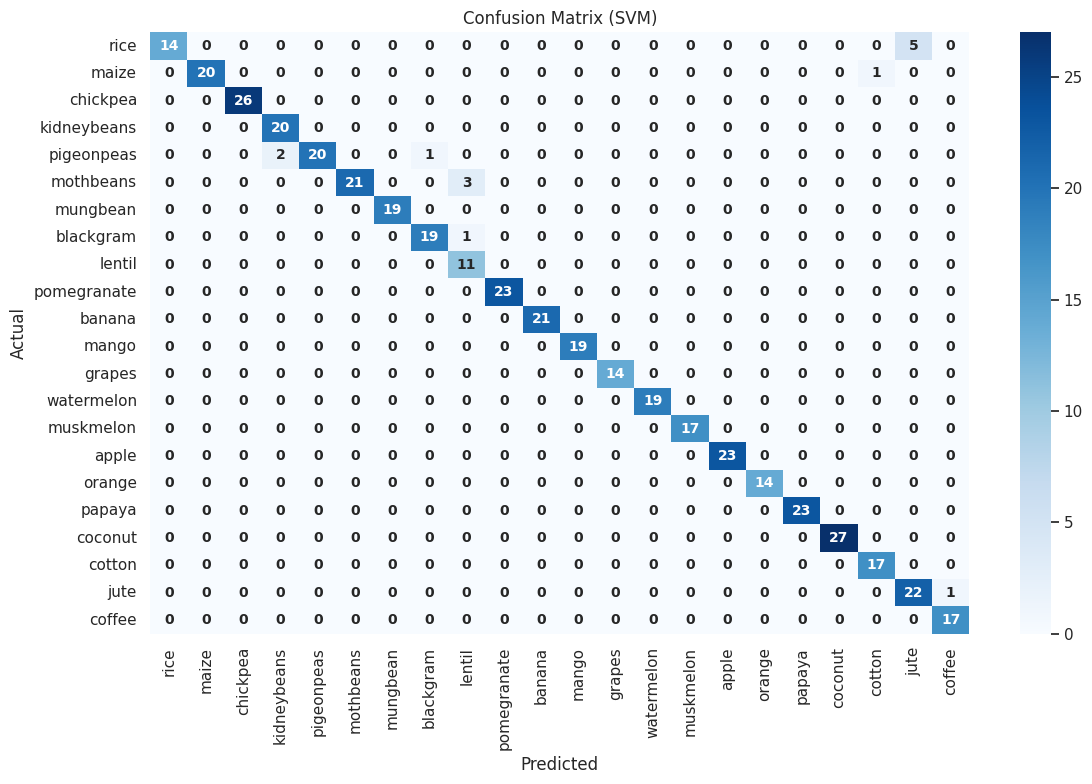

In [ ]:
# Confusion Matrix
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            annot_kws={"size": 10, "weight": "bold"})
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')  # Sensitivity
f1 = f1_score(y_test, y_pred, average='micro')

print("For test set:")
print(f"\nPrecision (micro): {precision:.4f}")
print(f"Recall (micro): {recall:.4f}")
print(f"F1-Score (micro): {f1:.4f}")

For test set:

Precision (micro): 0.9682
Recall (micro): 0.9682
F1-Score (micro): 0.9682


In [ ]:
# Classification Report
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           1       1.00      0.74      0.85        19
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        26
           4       0.91      1.00      0.95        20
           5       1.00      0.87      0.93        23
           6       1.00      0.88      0.93        24
           7       1.00      1.00      1.00        19
           8       0.95      0.95      0.95        20
           9       0.73      1.00      0.85        11
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        23
          17       1.00      1.00      1.00        14
    

#Decision Tree

In [ ]:
# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Fit to the training data
dt.fit(X_train, y_train)

# Predict on test data
y_pred = dt.predict(X_test)

# Accuracy
train_acc_dt = accuracy_score(y_train, dt.predict(X_train))
test_acc_dt = accuracy_score(y_test, y_pred)

print(f'Train Accuracy (Decision Tree): {train_acc_dt:.4f}')
print(f'Test Accuracy (Decision Tree): {test_acc_dt:.4f}')

dt_train_accuracy = train_acc_dt * 100
dt_accuracy = test_acc_dt * 100

Train Accuracy (Decision Tree): 1.0000
Test Accuracy (Decision Tree): 0.9864


Confusion Matrix: 


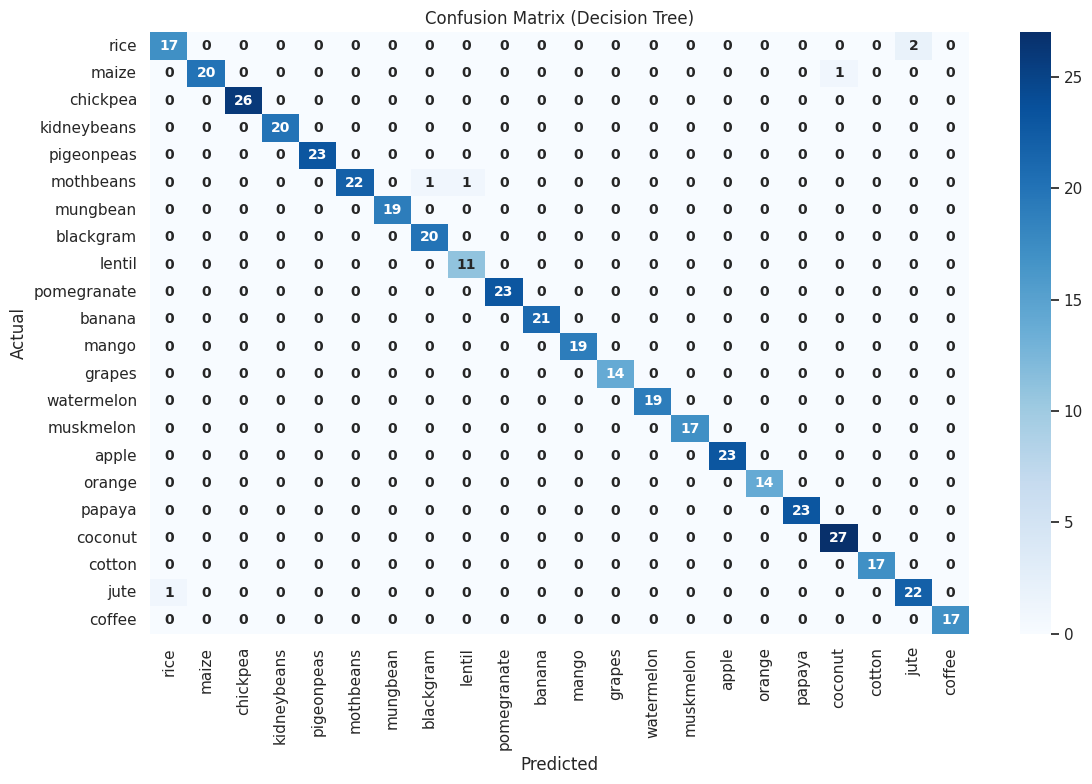

In [ ]:
# Confusion Matrix
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            annot_kws={"size": 10, "weight": "bold"})
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')  # Sensitivity
f1 = f1_score(y_test, y_pred, average='micro')

print("For test set:")
print(f"\nPrecision (micro): {precision:.4f}")
print(f"Recall (micro): {recall:.4f}")
print(f"F1-Score (micro): {f1:.4f}")

For test set:

Precision (micro): 0.9864
Recall (micro): 0.9864
F1-Score (micro): 0.9864


In [ ]:
# Classification Report
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           1       0.94      0.89      0.92        19
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        23
           6       1.00      0.92      0.96        24
           7       1.00      1.00      1.00        19
           8       0.95      1.00      0.98        20
           9       0.92      1.00      0.96        11
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        23
          17       1.00      1.00      1.00        14
    

#Random Forest

In [ ]:
# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Fit to the training data
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Accuracy
train_acc_rf = accuracy_score(y_train, rf.predict(X_train))
test_acc_rf = accuracy_score(y_test, y_pred)

print(f'Train Accuracy: {train_acc_rf:.4f}')
print(f'Test Accuracy: {test_acc_rf:.4f}')

rf_train_accuracy = train_acc_rf * 100
rf_accuracy = test_acc_rf * 100

Train Accuracy: 1.0000
Test Accuracy: 0.9932


Confusion Matrix: 


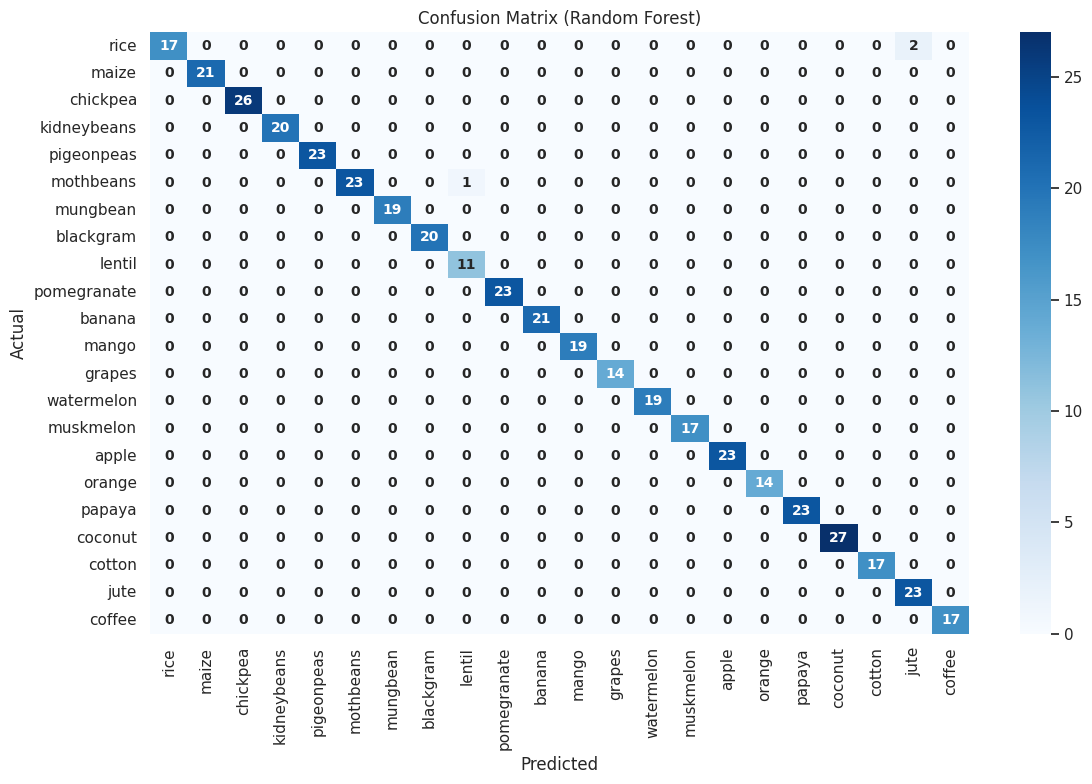

In [ ]:
# Confusion Matrix
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            annot_kws={"size": 10, "weight": "bold"})
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')  # Sensitivity
f1 = f1_score(y_test, y_pred, average='weighted')

print("For test set:")
print(f"\nPrecision (micro): {precision:.4f}")
print(f"Recall (micro): {recall:.4f}")
print(f"F1-Score (micro): {f1:.4f}")

For test set:

Precision (micro): 0.9937
Recall (micro): 0.9932
F1-Score (micro): 0.9932


In [ ]:
# Classification Report
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        23
           6       1.00      0.96      0.98        24
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        20
           9       0.92      1.00      0.96        11
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        23
          17       1.00      1.00      1.00        14
    

#ROC AUC

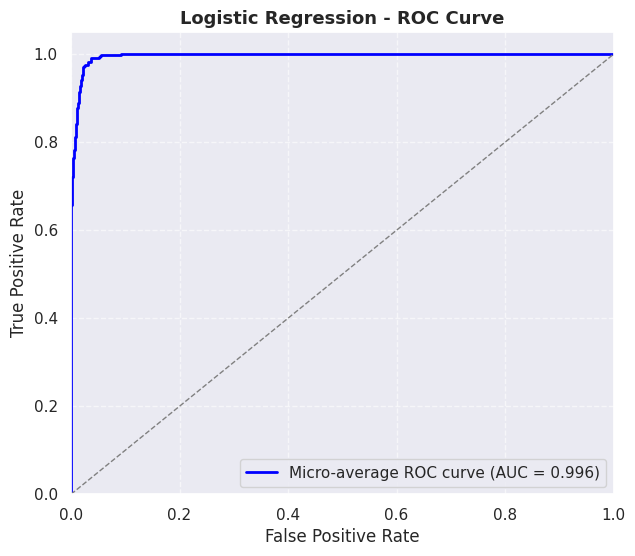

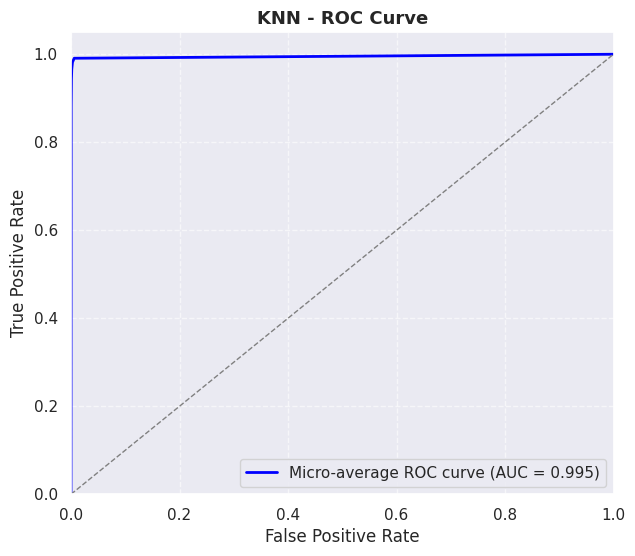

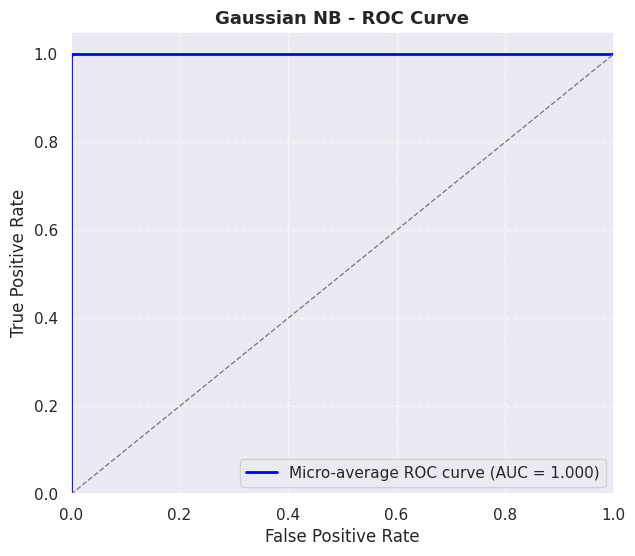

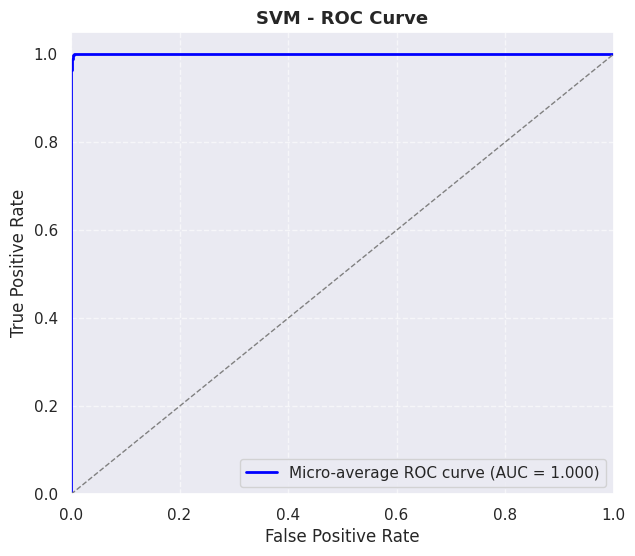

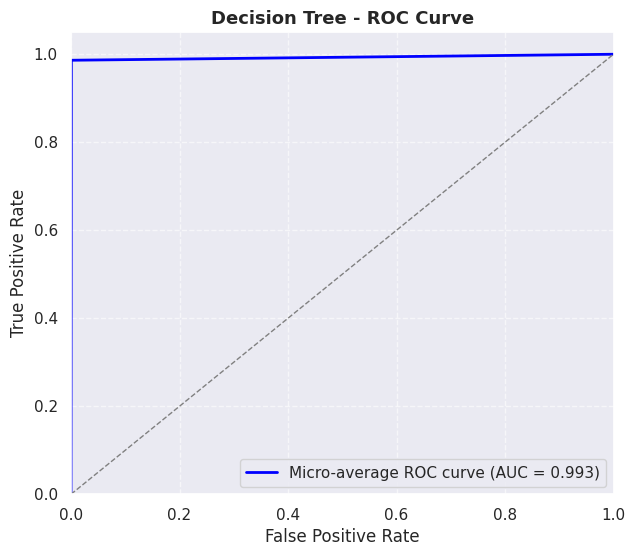

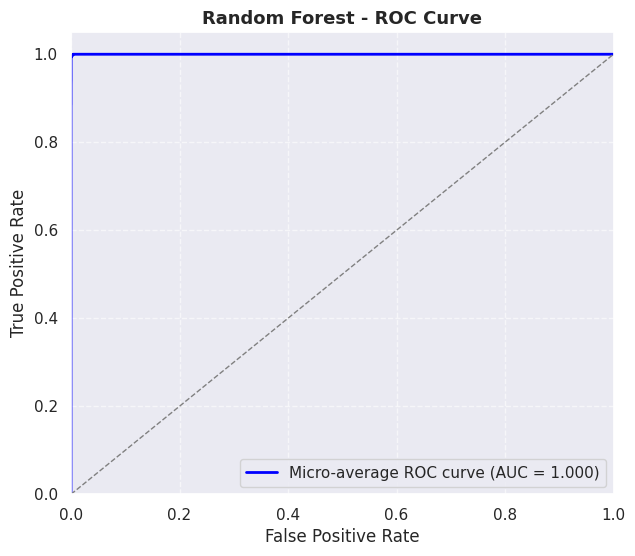

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output (for multiclass ROC)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Gaussian NB": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Loop through models and plot ROC for each
for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)

    # Get probability scores
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)

    # Compute micro-average ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = roc_auc_score(y_test_bin, y_score, multi_class="ovr", average="micro")

    # Create a new figure for each model
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', lw=2,
             label=f'Micro-average ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f"{name} - ROC Curve", fontsize=13, weight='bold')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()



#Model Comparison

In [ ]:
models = pd.DataFrame({
    'Model': ['LR', 'KNN', 'GNB', 'SVM', 'DT', 'RF'],
    'Train Accuracy': [lr_train_accuracy, knn_train_accuracy, gnb_train_accuracy, svm_train_accuracy, dt_train_accuracy, rf_train_accuracy],
    'Test Accuracy': [lr_accuracy, knn_accuracy, gnb_accuracy, svm_accuracy, dt_accuracy, rf_accuracy]
})

# Show sorted table
models_sorted = models.sort_values(by="Test Accuracy", ascending=False)
models_sorted

Model  Train Accuracy  Test Accuracy
2   GNB       99.488636      99.545455
5    RF      100.000000      99.318182
4    DT      100.000000      98.636364
1   KNN       99.090909      96.818182
3   SVM       98.522727      96.818182
0    LR       94.772727      91.818182

Model comparison using bar plot

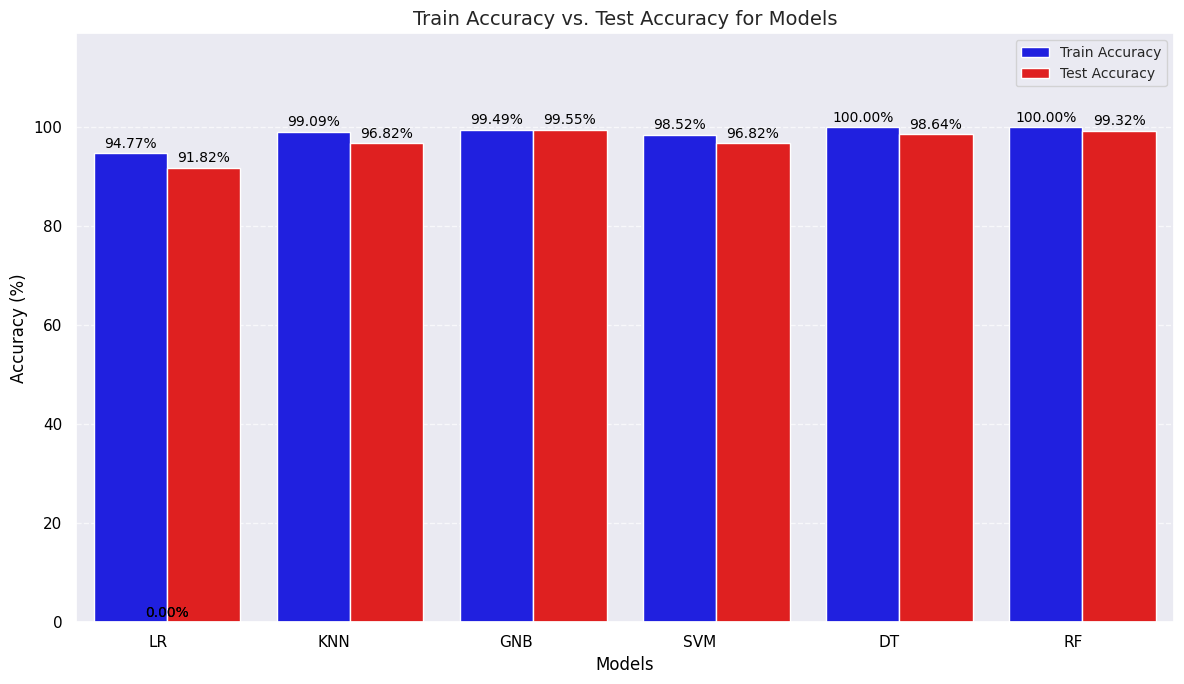

In [ ]:
# Melt the DataFrame to long format
df_melted = pd.melt(
    models,
    id_vars='Model',
    value_vars=['Train Accuracy', 'Test Accuracy'],
    var_name='Set',
    value_name='Accuracy'
)

# Plotting
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Model', y='Accuracy', hue='Set', data=df_melted, palette=['blue', 'red'])

# Annotate bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.2f}%',
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Formatting
plt.title('Train Accuracy vs. Test Accuracy for Models', fontsize=14)
plt.ylabel('Accuracy (%)', color='black')
plt.xlabel('Models', color='black')
plt.ylim(0, 119)
plt.yticks(np.arange(0, 119, 20), color='black')
plt.xticks(rotation=0, ha='right', color='black')
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='', title_fontsize=11, fontsize=10)

plt.tight_layout()
plt.show()

#Predictive System

We can see that Naive Bayes has achieved the best test accuracy (99.55%). So our predictive system will be based on Naive Bayes model.

In [ ]:
N = 86
P = 55
K = 21
temperature = 21.54156232
humidity = 59.64024162
ph = 6.803931519
rainfall = 109.7515385

sample = np.array([[N, P, K, temperature, humidity, ph, rainfall]])  # Example values
sample_scaled = minmax_scale.transform(sample)
pred_crop = gnb.predict(sample_scaled)
print("Recommended Crop:", pred_crop[0])

Recommended Crop: 2


#Saving Model

In [ ]:
pickle.dump(gnb,open('model.pkl','wb'))
pickle.dump(minmax_scale,open('minmax_scaler.pkl','wb'))